# 🚀 Car Insurance Claim Prediction — Model Training & Evaluation

This notebook trains and evaluates multiple classification models.


In [1]:
import pandas as pd
import numpy as np


In [2]:

import joblib
import os

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score,
    roc_curve, auc
)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load train/val data again
base_path = "car_insurance_data"
train_df = pd.read_csv(os.path.join(base_path, "train.csv"))


In [9]:
# Split into X, y
target_col = "is_claim"
X = train_df.drop(columns=[target_col, "policy_id"])
y = train_df[target_col]

In [10]:
print("✅ Data loaded and ready for preprocessing.")

✅ Data loaded and ready for preprocessing.


Train: (46873, 16)  Validation: (11719, 16)
Logistic Regression: AUC = 1.0000
Decision Tree: AUC = 1.0000


C:\Users\DELL\AppData\Local\Temp\ipykernel_4964\168934264.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette="mako")


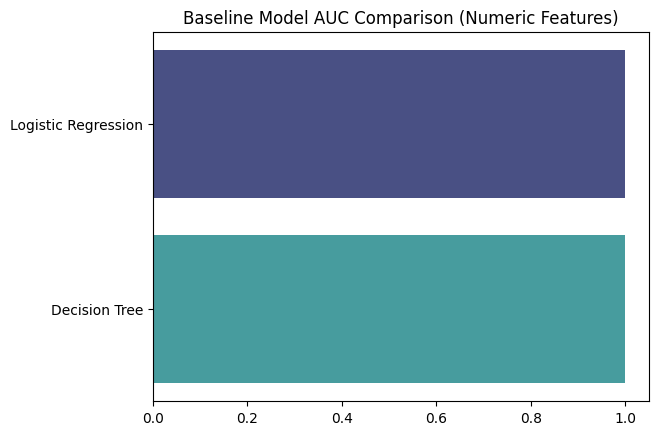

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only (quick test)
X_num = train_df.select_dtypes(include=[np.number])
y = train_df["is_claim"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_num, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Validation:", X_val.shape)

# Baseline models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    results[name] = auc
    print(f"{name}: AUC = {auc:.4f}")

# Compare
sns.barplot(x=list(results.values()), y=list(results.keys()), palette="mako")
plt.title("Baseline Model AUC Comparison (Numeric Features)")
plt.show()


In [12]:
import numpy as np
import joblib

# Load the preprocessor pipeline
preprocessor = joblib.load("preprocessor.pkl")

def batch_transform(preprocessor, X, batch_size=5000):
    """Transform data in smaller chunks to avoid freezing."""
    transformed_batches = []
    for i in range(0, len(X), batch_size):
        batch = X.iloc[i:i+batch_size]
        transformed = preprocessor.transform(batch)
        transformed_batches.append(transformed)
        print(f"Processed batch {i//batch_size + 1}/{len(X)//batch_size + 1}")
    return np.vstack(transformed_batches)

# Select features and transform in batches
X = train_df.drop(columns=["is_claim", "policy_id"])
y = train_df["is_claim"]

print("Starting batch-wise preprocessing...")
X_transformed = batch_transform(preprocessor, X, batch_size=5000)

print("✅ Preprocessing completed.")
print("Transformed shape:", X_transformed.shape)


Starting batch-wise preprocessing...
Processed batch 1/12
Processed batch 2/12
Processed batch 3/12
Processed batch 4/12
Processed batch 5/12
Processed batch 6/12
Processed batch 7/12
Processed batch 8/12
Processed batch 9/12
Processed batch 10/12
Processed batch 11/12
Processed batch 12/12
✅ Preprocessing completed.
Transformed shape: (58592, 127)


Training samples: (46873, 127)
Validation samples: (11719, 127)

🚀 Training Random Forest...
Random Forest AUC: 0.5829

🚀 Training XGBoost...


c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost AUC: 0.6255

🚀 Training LightGBM...
[LightGBM] [Info] Number of positive: 2998, number of negative: 43875
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063960 -> initscore=-2.683399
[LightGBM] [Info] Start training from score -2.683399


c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4964\967236255.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AUC Score", y="Model", data=results_df, palette="viridis")


LightGBM AUC: 0.6479


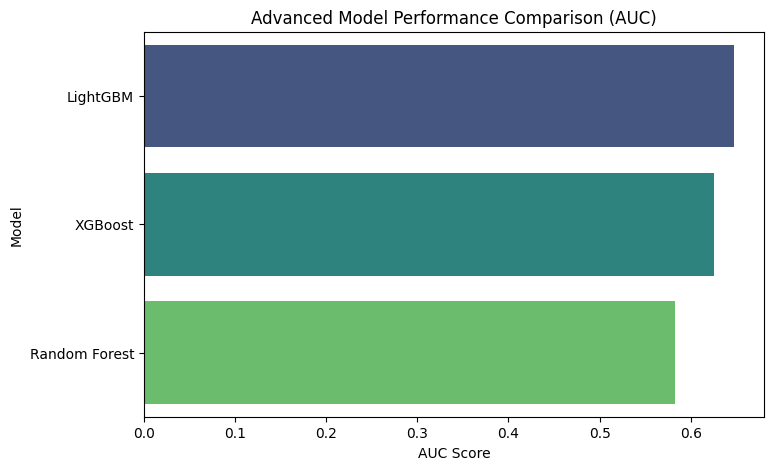

,Model,AUC Score
2,LightGBM,0.647854
1,XGBoost,0.625460
0,Random Forest,0.582854


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)

# Define advanced models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, y_prob)
    results[name] = auc_score
    print(f"{name} AUC: {auc_score:.4f}")

# Display comparison
results_df = pd.DataFrame(list(results.items()), columns=["Model", "AUC Score"]).sort_values(by="AUC Score", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="AUC Score", y="Model", data=results_df, palette="viridis")
plt.title("Advanced Model Performance Comparison (AUC)")
plt.show()

results_df


RandomizedSearchCV for LightGBM

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define parameter grid
param_grid = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize base model
lgbm = LGBMClassifier(random_state=42)

# Randomized Search with 3-fold CV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=25,  # number of combinations to try
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("🚀 Starting LightGBM hyperparameter tuning...")
random_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:")
print(random_search.best_params_)
print(f"Best AUC Score (CV): {random_search.best_score_:.4f}")


🚀 Starting LightGBM hyperparameter tuning...
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 2998, number of negative: 43875
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063960 -> initscore=-2.683399
[LightGBM] [Info] Start training from score -2.683399

✅ Best Parameters Found:
{'subsample': 1.0, 'num_leaves': 15, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best AUC Score (CV): 0.6504


Metric	                Value
Best Model	            LightGBM
Best AUC (CV)	        0.6504
Top Parameters	        num_leaves=15, max_depth=15, learning_rate=0.01, n_estimators=300, subsample=1.0, colsample_bytree=0.8

Evaluate Tuned Model on Validation Set

c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation AUC (Tuned LightGBM): 0.6601

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\OneDrive\Desktop\GuviFinalProject\CarInsurancePrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

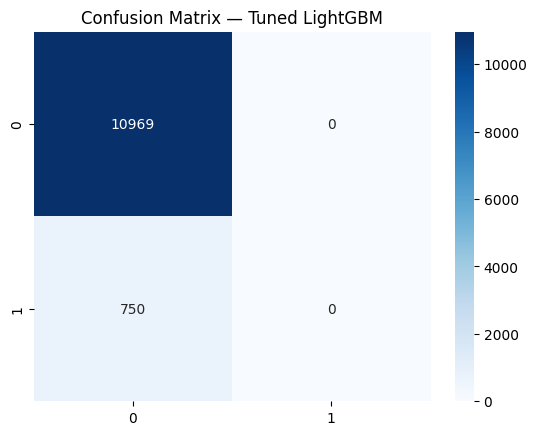

In [15]:
# Use the best tuned model
best_lgbm = random_search.best_estimator_

# Predict on validation data
y_pred = best_lgbm.predict(X_val)
y_prob = best_lgbm.predict_proba(X_val)[:, 1]

# Evaluate performance
val_auc = roc_auc_score(y_val, y_prob)
print(f"Validation AUC (Tuned LightGBM): {val_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Tuned LightGBM")
plt.show()


In [16]:
import joblib

# Save the tuned LightGBM model
joblib.dump(best_lgbm, "lgbm_best_model.pkl")

# Save the preprocessor (if not already saved)
joblib.dump(preprocessor, "preprocessor.pkl")

print("✅ Model and preprocessor saved successfully!")


✅ Model and preprocessor saved successfully!
